In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [66]:
dados = pd.read_csv('segmentacao.zip',compression="zip")
dados.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [67]:
# Dados limpos 
qtd_vendas = len(dados["País"])
data = dados["Data da fatura"]
id_cliente = ["ID Cliente"]
pais = dados["País"]
quantidade = dados["Quantidade"]
valor = dados["Valor"]
pais = pais.drop_duplicates()
quantidade = quantidade.sum()
valor = valor.sum()
dados.dropna(axis=1,inplace=True)
pais

0              United Kingdom
2                     Germany
9                        EIRE
13                     France
27                     Sweden
30                    Belgium
90                      Italy
140                     Japan
177                    Israel
188                  Portugal
240               Netherlands
266           Channel Islands
296               Switzerland
323                   Finland
461                     Spain
481                     Malta
683                 Singapore
742      United Arab Emirates
987                    Norway
1103                Hong Kong
1166                  Denmark
1192                Australia
1288                      USA
1295                   Poland
1700                Lithuania
2593       European Community
3111                  Austria
3230                   Cyprus
3525                  Iceland
4563              Unspecified
5190                   Canada
6050                   Greece
11847          Czech Republic
12292     

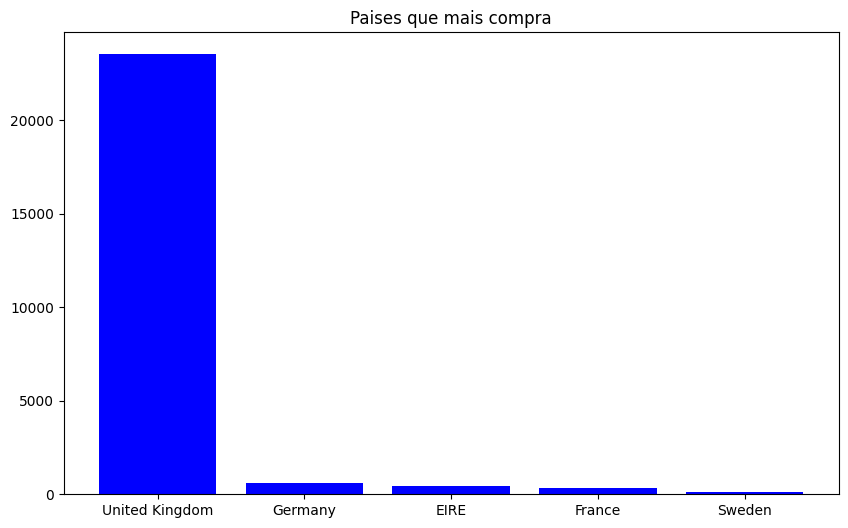

In [68]:
# paises que mais compra grafico 
import matplotlib.pyplot as plt
qtd_compra_pais = dados["País"].value_counts().head()
nome_pais = pais.head()
for c in enumerate(pais):
    c
plt.figure(figsize=(10,6))
plt.bar(nome_pais,qtd_compra_pais,color='blue')
plt.title('Paises que mais compra')
plt.show()


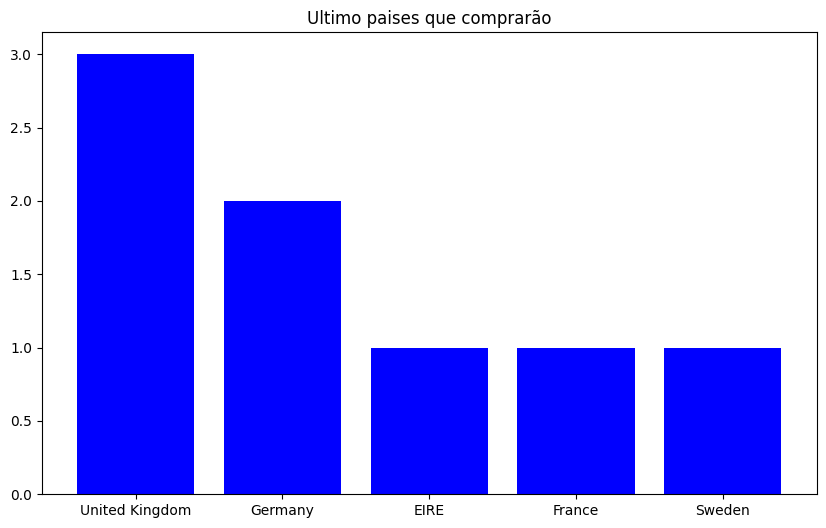

12292         Lebanon
13264          Brazil
14165             RSA
19664         Bahrain
24342    Saudi Arabia
Name: País, dtype: object

In [69]:
# Ultimo paises que comprarão 
paises_compra_menos = dados["País"].value_counts().tail()

nomes_ultimos = pais.tail()
plt.figure(figsize=(10,6))
plt.bar(nome_pais,paises_compra_menos,color='blue')
plt.title('Ultimo paises que comprarão')
plt.show()
nomes_ultimos

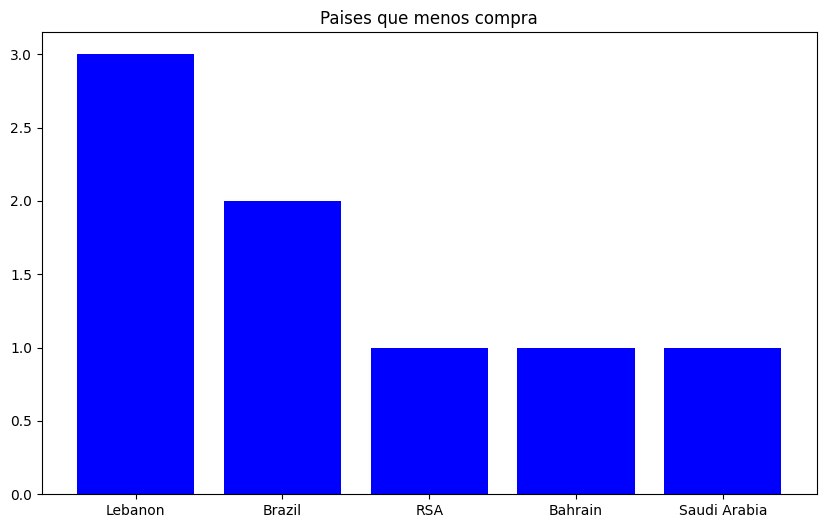

In [70]:
# Paises que menos Comprarão
maior_menor = dados["País"].value_counts()
paises_que_menos_comprarao = maior_menor.tail()
plt.figure(figsize=(10,6))
plt.bar(nomes_ultimos,paises_que_menos_comprarao,color='blue')
plt.title('Paises que menos compra')
plt.show()

In [71]:
todos_paises = dados["País"].value_counts()
# Preciso ver qual desse paises comprarão mais de uma vez 
paises_um = dados["País"].value_counts() == 1
uma_compra = 0 
mais_compra = 0 
for um in paises_um.astype("int64"):
    if um == 1:
        uma_compra += 1 
    else:
        mais_compra += 1


In [72]:
# Trabalhando com o melhor comprador (Reino Unido)
data_ultimas_vedas = data.tail(10)
ultimo_compradores = dados.tail(10)
ultima_compra = dados["Data da fatura"].iloc[-1]
qtd_compra_UK = dados["País"].value_counts() 
uk = qtd_compra_UK[0]

In [73]:
# treinando uma ml 

In [74]:
minmax = MinMaxScaler()

In [75]:
x_dados = dados.drop('País',axis=1)
x_minmax = x_dados.select_dtypes(exclude='object')
x_minmax = minmax.fit_transform(x_minmax)
y = dados['Quantidade']
x = x_minmax
x_minmax

array([[0.50075931],
       [0.50100623],
       [0.49999383],
       ...,
       [0.50064201],
       [0.50725971],
       [0.49862337]])

In [ ]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.33,random_state=42)
cerebro = RandomForestClassifier(n_estimators=500)
cerebro.fit(x_treino,y_treino)
accuracy_score(y_teste,cerebro.predict(x_teste))